<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Previsao/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 8 color = 'darkblue'> Machine Learnig - Detalhando Classificação</font>

#Sobre o Autor e o Notebook
Neste notebook contém estudos a respeito da técnica de classificação de Machine Learning, utilizando a biblioteca scikit-learn.

Este notebook possuirá diversas referencias, sendo uma delas o curso de machine learning da Alura. No entanto o autor tem suas informações detalhadas abaixo.

<font size =4> Autor: Kaue Hermann Abbehausen</font>

<font size =4> Linkedin: https://www.linkedin.com/in/kaue-abbehausen-5b1922165/</font>


<font size = 5 color = 'Black'> Sobre os dados</font>

Os dados que serão utilizados é de comportamento do cliente adentrando páginas de um site e avaliando se ele comprou ou não o produto. O que queremos é criar um modelo que informe se o cliente comprará ou não certo produto.

A base de dados que será utilizada neste notebook se encontra no link abaixo:
* [DADOS NO GITHUB](https://https://github.com/KaueAbbe/Projeto-Estude_Python/tree/main/Estude%20Machine%20Learning/dados)

# Importando biblioteca e dados

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Estude%20Machine%20Learning/dados/acesso.csv'
acesso = pd.read_csv(url)

In [ ]:
acesso.head(10)

,acessou_home,acessou_como_funciona,acessou_contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
5,1,0,1,1
6,1,1,0,0
7,1,0,1,1
8,1,1,0,0
9,1,0,1,1


 * 1 - Significa Sim
 * 0 - Significa Não

# Leve análise exploratória

In [ ]:
acesso.groupby('comprou').sum()

,acessou_home,acessou_como_funciona,acessou_contato
comprou,,,
0,21,34,31
1,32,6,31


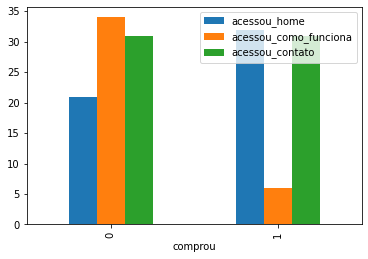

In [ ]:
acesso.groupby('comprou').sum().plot(kind = 'bar')

A maioria dos clientes que acessam como funciona não compram

# Como criar o modelo
Este modelo é um modelo básico para compreender os detalhes da criação de um modelo. Nas atividades seguintes estarão outros modelos com outros dados que tem o papel de fixar o conhecimento e debater outros assuntos.

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
x = acesso.drop('comprou', axis = 1)
y = acesso.comprou

In [ ]:
x.head()

,acessou_home,acessou_como_funciona,acessou_contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [ ]:
modelo = MultinomialNB()

In [ ]:
modelo.fit(x_treino, y_treino)

MultinomialNB()

In [ ]:
acuracia = modelo.score(x_teste, y_teste)*100
print(f'A acurácia foi de {round(acuracia,2)}%')

A acurácia foi de 86.67%


# Passos de criação de Modelo e Detalhes
## Primeiro Estudos

Vou separar a criação do modelo em 5 passos, sem pular o fato de que deve preparar os dados antes de criar o modelo. Segue abaixo alguns detalhes de como preparar os dados e os passos
## Passos 1: Preparar os Dados | Variáveis Categóricas
Para entender variáveis categóricas vamos analisar o dataset abaixo, focando na coluna busca

In [ ]:
url = 'https://raw.githubusercontent.com/KaueAbbe/Projeto-Estude_Python/main/Estude%20Machine%20Learning/dados/busca.csv'
busca = pd.read_csv(url)
busca.head()

,home,busca,logado,comprou
0,0,algoritmos,1,1
1,0,java,0,1
2,1,algoritmos,0,1
3,1,ruby,1,0
4,1,ruby,0,1


In [ ]:
busca.busca.unique()

array(['algoritmos', 'java', 'ruby'], dtype=object)

Temos 3 valores únicos nesta variávels e queremos transforma-los em valores binários (0,1) para colocarmos no nosso modelo. O pandas consegue fazer isto para nós utilizando get_dummies. O dummies vem do fato de que a coluna busca será transformada em outras 3 colunas, chamadas de variáveis dummies.

In [ ]:
buscaDummies = pd.get_dummies(busca)
buscaDummies.head()

,home,logado,comprou,busca_algoritmos,busca_java,busca_ruby
0,0,1,1,1,0,0
1,0,0,1,0,1,0
2,1,0,1,1,0,0
3,1,1,0,0,0,1
4,1,0,1,0,0,1


Agora que temos nossos valores binários podemos utilizá-lo parar criar nosso algoritmo.
## Passo 2: Criando um modelo


In [ ]:
buscaDummies[0:int(0.9*len(buscaDummies))]

,home,logado,comprou,busca_algoritmos,busca_java,busca_ruby
0,0,1,1,1,0,0
1,0,0,1,0,1,0
2,1,0,1,1,0,0
3,1,1,0,0,0,1
4,1,0,1,0,0,1
...,...,...,...,...,...,...
895,0,1,1,0,1,0
896,1,0,1,1,0,0
897,0,0,1,0,0,1
898,1,1,1,1,0,0


1. Separando nossos dados de treino, teste e validação

In [ ]:
x = buscaDummies[0:int(0.9*len(buscaDummies))].drop('comprou', axis = 1)
y = buscaDummies[0:int(0.9*len(buscaDummies))].comprou
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 42)

x_validacao = buscaDummies[int(0.9*len(buscaDummies)):].drop('comprou', axis = 1)
y_validacao = buscaDummies[int(0.9*len(buscaDummies)):].comprou

<font color = 'green' size =5> Debatendo o MultinomialNB (Baseado em Bernoulli Naive Bayes)</font>

O Bernoulli Naive Bayes funciona baseado em probabilidade, e probabilidade condicional. Para alcançar o resultado de previsão, o modelo faz tabelas de probabilidade de escolha para cada variável. A ideia de probabilidade simples: Qual a probabilidade de escolher aleatoriamente uma pessoa que entrou na home?

Fazendo isto para todas as variáveis ele calcula a probabilidade de uma pessoa ter feito a variável 1 e a variável 2. Após isto, esta variável dá a probabilidade de a poder se encaixar como comprador ou não, e a depender deste valor o modelo toma sua decisão.

[LEIA MAIS AQUI](https://https://iq.opengenus.org/bernoulli-naive-bayes/)

In [ ]:
modelo = MultinomialNB()
modelo.fit(x_treino, y_treino)
acuracia = modelo.score(x_teste, y_teste)*100
print(f'A acurácia foi de {round(acuracia,2)}%')

A acurácia foi de 84.07%


## Passo 3: Comparar nosso modelo com modelo Base

Para comparar nosso modelo vamos utilizar um modelo mais simples como modelo de base. Este modelo funciona devolvendo sempre a mesma resposta.

Vamos ver o que acontece quando o nosso modelo responde sempre 1 ou sempre 0.

In [ ]:
Quanti_1 = busca.comprou.value_counts()[1]
acertos_1 = Quanti_1/len(busca.comprou) * 100

Quanti_0 = busca.comprou.value_counts()[0]
acertos_0 = Quanti_0/len(busca.comprou) * 100

print(f'Apenas 1 acertou {acertos_1}%')
print(f'Apenas 0 acertou {acertos_0}%')
print(f'A acurácia do modelo: {round(acuracia,2)}%')

Apenas 1 acertou 83.2%
Apenas 0 acertou 16.8%
A acurácia do modelo: 84.07%


Vemos com estes valores que o modelo acerta 0,13% a mais que o modelo apenas 1. Logo nosso base está muito próximo da linha de base. Precisamos melhorar este modelo. Podemos fazer esta mesma sequência de linhas com um modelo do scikit-learn, chamado: Dummy

## Passo 4: Criando segundo(ou mais) Modelo: Adaboost

Após criar o segundo modelo (e outros) analisar quem é o modelo que teve maior acurácia e escolher ele para os dados de validação

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
modeloada = AdaBoostClassifier()
modeloada.fit(x_treino, y_treino)
acuraciaada = modeloada.score(x_teste, y_teste)*100
print(f'A acurácia Ada foi de {round(acuraciaada,2)}%')

A acurácia Ada foi de 86.67%


In [ ]:
print(f'Apenas 1 acertou {acertos_1}%')
print(f'Apenas 0 acertou {acertos_0}%')
print(f'A acurácia do modelo: {round(acuracia,2)}%')
print(f'A acurácia Ada foi de {round(acuraciaada,2)}%')

Apenas 1 acertou 83.2%
Apenas 0 acertou 16.8%
A acurácia do modelo: 84.07%
A acurácia Ada foi de 86.67%


## Passo 4: Validação do Melhor Modelo

O melhor modelo foi o Ada. Por isto vamos pegar este modelo e dar novos valores a ele, e assim verificar se está válido as respostas dele. É importante que não haja diferença de acurácia entre o teste e a validação, e que o resultado continue acima do modelo base.

In [ ]:
acuraciaada_valida = modeloada.score(x_validacao, y_validacao)*100
print(f'A acurácia de validação foi de {round(acuraciaada_valida,2)}%')

A acurácia de validação foi de 85.0%


# Segundo Estudo

Neste segundo estudo não farei uso do passo de validação para não tomar tempo, já que este é um projeto de estudo. Fica aqui dito que este passo é importante, e não deve ser pulado ao realizar o projeto real.

## Importar os dados

In [78]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'
aluravoz_df = pd.read_csv(url)

In [8]:
aluravoz_df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## Preparar os dados
Note que há variáveis categóricas e variávels quantitativas. Vamos arrumar isso utilizando o get_dummies

In [20]:
df_dummie = pd.get_dummies(aluravoz_df)

In [21]:
df_dummie

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Nao,Conjuge_Sim,Dependentes_Nao,Dependentes_Sim,TelefoneFixo_Nao,TelefoneFixo_Sim,VariasLinhasTelefonicas_Nao,...,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Nao,PagamentoOnline_Sim,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn_Nao,Churn_Sim
0,0,1,29.85,0,1,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,0,34,56.95,1,0,1,0,0,1,1,...,0,1,1,0,0,0,1,0,1,0
2,0,2,53.85,1,0,1,0,0,1,1,...,1,0,0,1,0,0,1,0,0,1
3,0,45,42.30,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,1,1,0
4,0,2,70.70,1,0,1,0,0,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
7039,0,72,103.20,0,1,0,1,0,1,0,...,0,1,0,1,1,0,0,0,1,0
7040,0,11,29.60,0,1,0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
7041,1,4,74.40,0,1,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


In [22]:
df_dummie.shape

(7043, 44)

In [23]:
df_dummie.columns

Index(['Maior65Anos', 'MesesDeContrato', 'ContaMensal', 'Conjuge_Nao',
       'Conjuge_Sim', 'Dependentes_Nao', 'Dependentes_Sim', 'TelefoneFixo_Nao',
       'TelefoneFixo_Sim', 'VariasLinhasTelefonicas_Nao',
       'VariasLinhasTelefonicas_SemServicoTelefonico',
       'VariasLinhasTelefonicas_Sim', 'ServicoDeInternet_DSL',
       'ServicoDeInternet_FibraOptica', 'ServicoDeInternet_Nao',
       'SegurancaOnline_Nao', 'SegurancaOnline_SemServicoDeInternet',
       'SegurancaOnline_Sim', 'BackupOnline_Nao',
       'BackupOnline_SemServicoDeInternet', 'BackupOnline_Sim',
       'SeguroNoDispositivo_Nao', 'SeguroNoDispositivo_SemServicoDeInternet',
       'SeguroNoDispositivo_Sim', 'SuporteTecnico_Nao',
       'SuporteTecnico_SemServicoDeInternet', 'SuporteTecnico_Sim',
       'TVaCabo_Nao', 'TVaCabo_SemServicoDeInternet', 'TVaCabo_Sim',
       'StreamingDeFilmes_Nao', 'StreamingDeFilmes_SemServicoDeInternet',
       'StreamingDeFilmes_Sim', 'TipoDeContrato_DoisAnos',
       'TipoDeContra

* Existem algumas colunas que são repetidas e invertidas, vamos retirar essas colunas. Vale a pena retirar esses valores pois há repetição dos dados invertidos, por exemplo: teremos que informar positivamente que a pessoa não tem conjugue, e negativamente que ela não tem.

In [24]:
df_dummie.drop(['Conjuge_Nao','Dependentes_Nao','TelefoneFixo_Nao','VariasLinhasTelefonicas_Nao','SeguroNoDispositivo_Nao','TVaCabo_Nao',
                'StreamingDeFilmes_Nao','Churn_Nao','SegurancaOnline_Nao','BackupOnline_Nao','SuporteTecnico_Nao','PagamentoOnline_Nao'],axis = 1, inplace = True)

In [25]:
df_dummie.head()

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Sim,Dependentes_Sim,TelefoneFixo_Sim,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,...,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Sim,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn_Sim
0,0,1,29.85,1,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1,0,34,56.95,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,2,53.85,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,0,45,42.30,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,2,70.70,0,0,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1


In [26]:
pd.set_option('display.max_columns',40)

In [27]:
df_dummie.head()

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Sim,Dependentes_Sim,TelefoneFixo_Sim,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Sim,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn_Sim
0,0,1,29.85,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
1,0,34,56.95,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,2,53.85,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0,45,42.30,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,2,70.70,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1


## Tratando Dados Desbalanceados 
Quando nosso target tem mais dados de um valor do que de outro temos dados desbalanceados. Devemos balancear os dados para que não ocorra problemas na criação dos modelos. Podemos fazer isso de duas formas:

**Oversampling:** Consiste em criar novos dados baseados nos dados que temos, de forma a igualar a proporção. É basicamente aumentar a quantidade do valor que está por baixo.

**Undersampling:** Consiste em diminuir a quantidade de valores daqueles que estão por cima. 



> "Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras."

Se precisar instalar !pip install -U imbalanced-learn



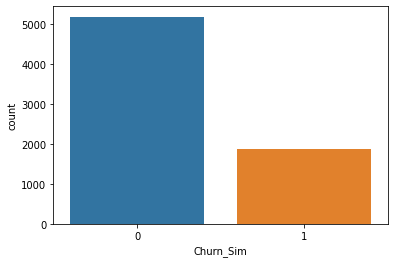

In [30]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn_Sim', data=df_dummie)

In [31]:
X = df_dummie.drop('Churn_Sim', axis = 1)
y = df_dummie['Churn_Sim']

In [32]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

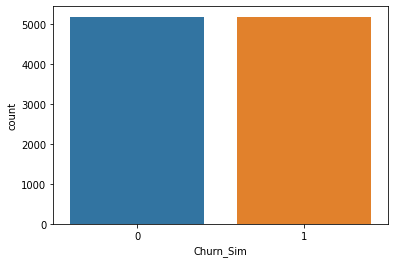

In [36]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
ax = sns.countplot(x='Churn_Sim', data=dados_final)  # plotando a variável target balanceada.

## Criando Modelo KNN(k-Nearest Neighbors)
O modelo KNN criar num plano pontos que são definidos pelos dados dos clientes. Para definir se um novo cliente tem churn sim ou não ele irá verificar a quantidade de vizinhos próximos a ele, e a depender destes vizinhos o modelo irá tomar sua decisão.

A quantidade de vizinhos é definido pelo número k, e a decisão do modelo é baseada em maior frequência da mesma categoria dos k vizinhos próximos.

**Problemas que podem ocorrer:**
* **overfitting:** É o ajuste perfeito aos dados de treinos. No nosso caso pode ocorrer quando k é muito pequeno
* **Underfitting:** É o ajuste errado aos dados devido ao excesso de classes dentro da nossa previsão. Este caso pode ocorrer quando k é muito grande

É possível alterar a forma com que o modelo irá calcular a distância entre os dois pontos por padrão usamos a distância Euclidiana dada por

$d = \sqrt{\sum_{i}(a_{i} - b{_i})^2} $ 

[PARA SABER MAIS DISTÂNCIAS](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric)

In [55]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1]]

In [48]:
x = dados_final.drop('Churn_Sim', axis = 1)
y = dados_final['Churn_Sim']

In [49]:
x.head(1)

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Sim,Dependentes_Sim,TelefoneFixo_Sim,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Sim,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


* Para criar o modelo temos que normalizar eles, isto é, deixar na mesma escala para que não haja problemas

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
norm = StandardScaler()

In [52]:
x_normalizado = norm.fit_transform(x)
x_normalizado[0]

array([-0.41254225, -1.10801061, -1.32185087,  1.26439477, -0.53055261,
       -3.05744992,  3.19550741, -0.81975527,  1.51545085, -1.04205076,
       -0.44648735, -0.44648735, -0.51646889, -0.44648735,  1.58963068,
       -0.44648735, -0.63401739, -0.44648735, -0.52366718, -0.44648735,
       -0.76925621, -0.44648735, -0.77675399, -0.44648735,  0.73960631,
       -0.42005218,  0.81039516, -0.42877295,  1.29566473, -0.48399972,
       -0.43711342])

In [56]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns= x.columns))
Xmaria_normalizado

array([[ -0.41254225,  -1.14968555,  -2.3248881 ,   1.26439477,
         -0.53055261,  -3.05744992, 139.67408622,   1.21987626,
         -0.65986964,  -1.04205076,  -0.44648735,   2.23970513,
         -0.51646889,   2.23970513,  -0.62907694,  -0.44648735,
         -0.63401739,  -0.44648735,   1.90960985,   2.23970513,
          1.29995701,  -0.44648735,  -0.77675399,   2.23970513,
         -1.35207067,   2.38065658,  -1.23396591,  -0.42877295,
         -0.7718046 ,  -0.48399972,   2.28773577]])

## Separar os dados e aplicar no KNN

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
x_treino,x_teste, y_treino, y_teste = train_test_split(x_normalizado,y, test_size=0.3, random_state = 42)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(metric = 'euclidean')

In [71]:
knn.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [72]:
knn_acuracia = knn.score(x_teste, y_teste).round(2)*100
print(f'Valor de Acurácia KNN: {knn_acuracia}%')

Valor de Acurácia KNN: 82.0%


## Modelo 2: Bernoulli Naive bayes

In [73]:
from sklearn.naive_bayes import BernoulliNB

In [79]:
np.median(x_treino)

-0.4464873462866174

O Naive Bayes somente funciona com vlores binários. Como no dataset não há somente valores binários usando uma função para tornar os valores em valores binários, o binaraze do próprio BernoulliNB. 

Foi usando como "limite" a mediana dos dados. Este limite diz que todos abaixo do valor do limite será classificado como 0, e acima como 1.

In [82]:
bnb = BernoulliNB(binarize =-0.44 )

In [83]:
bnb.fit(x_treino,y_treino)

BernoulliNB(binarize=-0.44)

In [85]:
bnb_acuracia = bnb.score(x_teste, y_teste).round(2)*100
print(f'Valor de Acurácia BNB: {bnb_acuracia}%')

Valor de Acurácia BNB: 78.0%


## Terceiro Modelo: Árvore de Decisão
Para árvore de decisão é utilizado nós para seguir um fluxo de perguntas e respostas, até chegar numa folha que é a resposta final. Os nós são decidos por um cálculo de pureza dos dados.

* **Vantagens:** Não necessidade tratamento dos dados categóricos e numéricos; É possível visualizar como o modelo toma decisões.

* **Desvantagens:** É possível ocorrer um Overfitting, devido alta complexidade; Podem ocorrer de gerar uma sub-árvore.

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth= 5)

In [97]:
dtc.fit(x_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [98]:
dtc.feature_importances_

array([0.00078575, 0.13759278, 0.04906544, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06888081,
       0.        , 0.        , 0.01939946, 0.        , 0.        ,
       0.        , 0.        , 0.00959152, 0.00926739, 0.        ,
       0.        , 0.        , 0.        , 0.08976451, 0.3812658 ,
       0.19234661, 0.        , 0.00210531, 0.        , 0.01021913,
       0.02971548])

In [99]:
dtc_acuracia = dtc.score(x_teste, y_teste).round(2)*100
print(f'Valor de Acurácia DTC: {dtc_acuracia}%')

Valor de Acurácia DTC: 81.0%


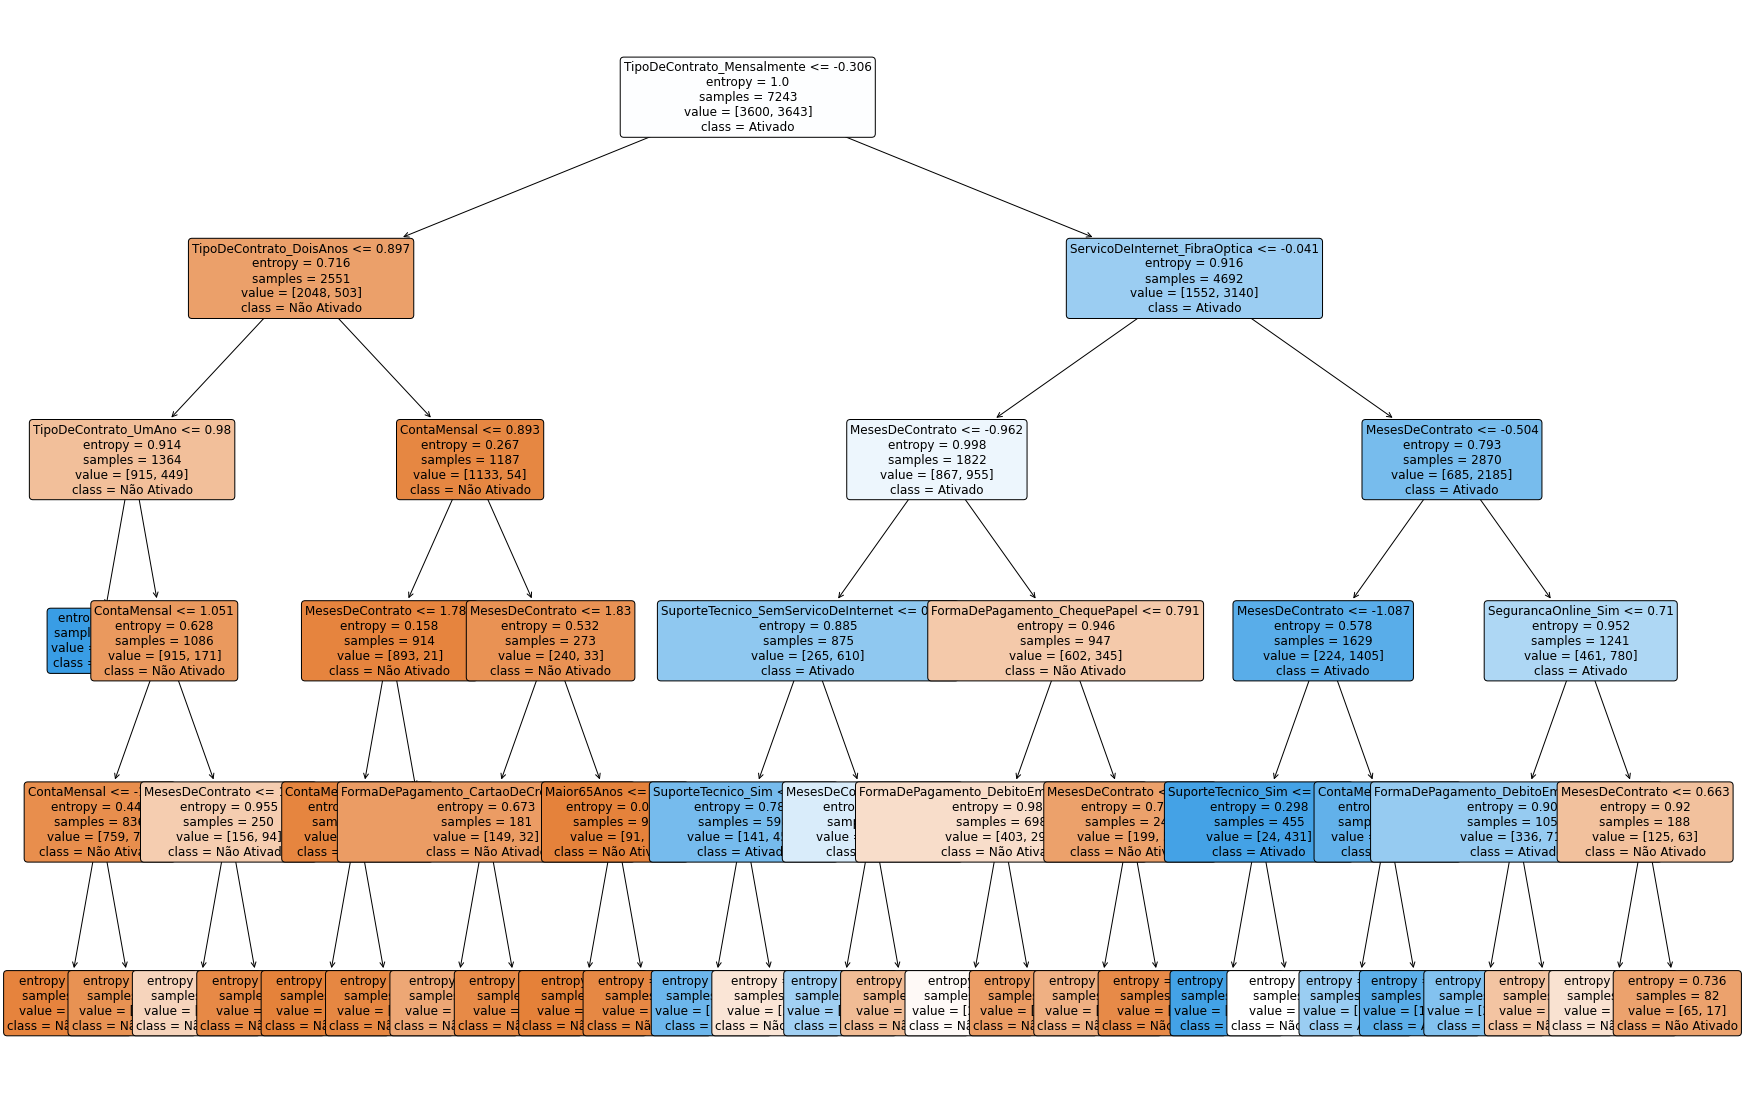

In [102]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (30,20))
tree.plot_tree(dtc, ax=ax, fontsize = 12, rounded = True,
               filled = True, feature_names = dados_final.drop('Churn_Sim', axis = 1).columns,
               class_names = ['Não Ativado', 'Ativado'])

plt.show()

## Métricas de Validação de Modelo
### Matriz Confusão

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
knn_previsto = knn.predict(x_teste)
knn_previsto

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [105]:
bnb_previsto = bnb.predict(x_teste)
bnb_previsto

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [106]:
dtc_previsto = dtc.predict(x_teste)
dtc_previsto

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

A matriz confusão funciona da seguinte forma
11 - Previsto 1, real 1. 
12 - Previsto 0, real 1
21 - Previsto 1, real 0
22 - Previsto 0, real 0

Ou seja, queremos maximas a diagonal principal, e minimizar a diagonal oposta

In [107]:
print(confusion_matrix(y_teste,knn_previsto))

[[1232  342]
 [ 213 1318]]


In [108]:
print(confusion_matrix(y_teste,bnb_previsto))

[[1079  495]
 [ 179 1352]]


In [109]:
print(confusion_matrix(y_teste,dtc_previsto))

[[1287  287]
 [ 318 1213]]


###  Acurácia
* A acurácia é uma boa indicação geral da performance do modelo. Mas, em algumas situações, como em modelos de identificação de fraudes, ela pode ser um pouco enganosa.

In [110]:
from sklearn.metrics import accuracy_score

In [114]:
print(accuracy_score(y_teste, knn_previsto)*100)
print(f'Valor de Acurácia DTC: {knn_acuracia}%')

82.1256038647343
Valor de Acurácia DTC: 82.0%


In [115]:
print(accuracy_score(y_teste, bnb_previsto)*100)
print(f'Valor de Acurácia DTC: {bnb_acuracia}%')

78.29307568438003
Valor de Acurácia DTC: 78.0%


In [116]:
print(accuracy_score(y_teste, dtc_previsto)*100)
print(f'Valor de Acurácia DTC: {dtc_acuracia}%')

80.51529790660226
Valor de Acurácia DTC: 81.0%


### Precisão
A precisão mede quantos valores positivos foram previstos. 
* A precisão pode ser utilizada em situações em que os Falsos Positivos são mais prejudiciais que os Falsos Negativos.

In [117]:
from sklearn.metrics import precision_score

In [118]:
print(precision_score(y_teste, knn_previsto)*100)

79.39759036144578


In [119]:
print(precision_score(y_teste, bnb_previsto)*100)

73.19978343259339


In [120]:
print(precision_score(y_teste, dtc_previsto)*100)

80.86666666666666


### Recall
Mede o quão bom o modelo é bom em calculado valores verdadeiramente positivos

In [121]:
from sklearn.metrics import recall_score

In [122]:
print(recall_score(y_teste, knn_previsto)*100)

86.08752449379492


In [124]:
print(recall_score(y_teste, bnb_previsto)*100)

88.3082952318746


In [125]:
print(recall_score(y_teste, dtc_previsto)*100)

79.22926192031352


## Escolhendo o Melhor Modelo

Neste caso, como queremos dar foco aos clientes positivos, e por escolha, foi tomado como métrica de decisão final a precisão. Abaixo estão os valores da precisão mostrando que devemos escolher **Árvore de Decisão**

In [127]:
print(f'KNN: {precision_score(y_teste, knn_previsto)*100}')
print(f'BNB: {precision_score(y_teste, bnb_previsto)*100}')
print(f'DTC: {precision_score(y_teste, dtc_previsto)*100}')

KNN: 79.39759036144578
BNB: 73.19978343259339
DTC: 80.86666666666666
